# Contents

1. [Capture Video from Camera](#1)
1. [Capture Video from IP Camera](#2)
1. [Playing Video from File](#3)
1. [Playing Video from Youtube](#4)
1. [Saving a Video](#5)
1. [Video Capture Properties](#6)
1. [Background Subtraction](#7)
1. [Trackbar](#8)
1. [Simple Blob Detection](#9)
1. [Calculate FPS](#10)
1. [Image to Text](#11)
    * [Real Time Text Recognition ](#12)

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time # for calculate FPS
import pafy # for import video from youtube
import requests # for using IP camera
import pytesseract # for image to text

import warnings
warnings.filterwarnings("ignore")

<a id = "1"></a><br>
# Capture Video from Camera

Often, we have to capture live stream with a camera. OpenCV provides a very simple interface to do this. Let's capture a video from the camera (I am using the built-in webcam on my laptop) and display it. Just a simple task to get started.

To capture a video, you need to create a VideoCapture object. Its argument can be either the device index or the name of a video file. A device index is just the number to specify which camera. Normally one camera will be connected (as in my case). So I simply pass 0. You can select the external camera by passing 1. After that, you can capture frame-by-frame. But at the end, don't forget to release the capture.

* cv2.VideoCapture(0): Means first camera or webcam.

* cv2.VideoCapture(1):  Means second camera or webcam.

* cv2.VideoCapture("file_name.mp4"): Means video file

In [3]:
cap = cv2.VideoCapture(0)

# check the camera 
if not cap.isOpened():
    """
    Sometimes, cap may not have initialized the capture.
    You can check whether it is initialized or not by the method cap.isOpened(). 
    If it is True, OK. Otherwise open it using cap.open().
    """
    cap.open(index= 0, apiPreference = cv2.CAP_ANY)
    
while True:
    # Capture frame-by-frame
    isTrue, frame = cap.read() # if frame is read correctly, isTrue is True :)
    
    if isTrue is not True: # if isTrue is False, break the loop, because done video
        break

    # flip the frame according to the y-axis
    frame= cv2.flip(frame, 1)
 
    # Display the resulting frame
    cv2.imshow('Frame', frame)
    
    if cv2.waitKey(1) & 0xFF== ord('q'): # if i press q, break the loop
        break
        
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

<a id = "2"></a><br>
# Capture Video from IP Camera

In [ ]:
# The use of IP cameras made in this way does not require internet, 
# but the computer and camera must be connected to the same network.

url= "http://10.62.225.180:8081" # ip cam url

cap= cv2.VideoCapture(url)

while True:
    
    ret, frame= cap.read()
    
    if not ret:
        print("Camera is not available")
        break
        
    cv2.imshow("IP Camera", frame)
    
    if cv2.waitKey(1)== 27: # if press "esc" , break the loop
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
# if using the request module, internet is required for our connection process.

url=  "http://10.62.225.180:8081//shot.jpg" # ip cam url

while True:
    
    img_resp= requests.get(url) # getting image 
    
    img_arr= np.array(bytearray(img_resp.content), dtype=np.uint8) # setting image dtype
    
    img= cv2.imdecode(img_arr, cv2.IMREAD_COLOR) # decoding
    
    img= cv2.resize( img, (640,480))
        
    cv2.imshow("IP Camera", img)
    
    if cv2.waitKey(1)== 27: # if press "esc" , break the loop
        break
    
cv2.destroyWindow()

<a id = "3"></a><br>
# Playing Video from File

Playing video from file is the same as capturing it from camera, just change the camera index to a video file name. Also while displaying the frame, use appropriate time for cv2.waitKey(). If it is too less, video will be very fast and if it is too high, video will be slow (Well, that is how you can display videos in slow motion). 25 milliseconds will be OK in normal cases.

In [4]:
video_path= "...\\Github\\Basic OpenCV Tutorial\\Videos\\MOT17-13-FRCNN-raw.webm"
cap = cv2.VideoCapture(video_path)

while True:
    
    ret, frame = cap.read()
    
    if ret is False:
        break
        
    cv2.imshow('Frame', frame)
    
    if cv2.waitKey(25) == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

<a id = "4"></a><br>
# Playing Video from Youtube

In [5]:
url = "https://youtu.be/M1bhOaLV4FU"
video = pafy.new(url)
best = video.getbest(preftype="any")

cap = cv2.VideoCapture(best.url)

while True:

    ret, frame = cap.read()
    
    if not ret:
        break
        
    frame= cv2.resize(frame, (720,480))

    cv2.imshow('frame',frame)
    
    if cv2.waitKey(30) & 0xFF== ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

<a id = "5"></a><br>
# Saving a Video

We create a VideoWriter object. First we should specify the output file name (eg: output.avi). Then we should specify the FourCC code. Then number of frames per second (fps) and frame size should be passed. And the last one is the isColor flag. If it is True, the encoder expect color frame, otherwise it works with grayscale frame.

[FourCC](https://en.wikipedia.org/wiki/FourCC) is a 4-byte code used to specify the video codec. The list of available codes can be found in [fourcc web site](https://www.fourcc.org/codecs.php).

In [6]:
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')

output = cv2.VideoWriter( filename= 'output.avi', 
                          fourcc= fourcc, 
                          fps= 25, 
                          frameSize= (640,  480))

while cap.isOpened():
    
    ret, frame = cap.read()
    
    if not ret:
        break
        
    frame = cv2.flip(frame, 0)
    
    # write the flipped frame
    output.write(frame)
    
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break
        
# Release everything if job is finished
cap.release()
output.release()
cv2.destroyAllWindows()

<a id = "6"></a><br>
# Video Capture Properties

In [7]:
video_path= "...\\Github\\Basic OpenCV Tutorial\\Videos\\MOT17-13-FRCNN-raw.webm"
cap= cv2.VideoCapture(video_path)

In [8]:
for i in range(250):
    _, frame= cap.read()

In [9]:
# Decodes and returns the grabbed video frame.
"""
The method decodes and returns the just grabbed frame. 
If no frames has been grabbed (camera has been disconnected, or there are no more frames in video file), 
the method returns false and the function returns an empty image.
"""
ret, grabbed_frame= cap.retrieve()
print(ret)
plt.imshow(grabbed_frame[:,:,[2,1,0]]), plt.axis("off");

True


For reference, the first argument in the cap.set() and cap.get() command refers to the enumeration of the camera properties, listed below:



0. CV_CAP_PROP_POS_MSEC: Current position of the video file in milliseconds.
1. CV_CAP_PROP_POS_FRAMES: 0-based index of the frame to be decoded/captured next.
2. CV_CAP_PROP_POS_AVI_RATIO: Relative position of the video file
3. CV_CAP_PROP_FRAME_WIDTH: Width of the frames in the video stream.
4. CV_CAP_PROP_FRAME_HEIGHT: Height of the frames in the video stream.
5. CV_CAP_PROP_FPS: Frame rate.
6. CV_CAP_PROP_FOURCC: 4-character code of codec.
7. CV_CAP_PROP_FRAME_COUNT: Number of frames in the video file.
8. CV_CAP_PROP_FORMAT: Format of the Mat objects returned by retrieve() .
9. CV_CAP_PROP_MODE: Backend-specific value indicating the current capture mode.
10. CV_CAP_PROP_BRIGHTNESS: Brightness of the image (only for cameras).
11. CV_CAP_PROP_CONTRAST: Contrast of the image (only for cameras).
12. CV_CAP_PROP_SATURATION: Saturation of the image (only for cameras).
13. CV_CAP_PROP_HUE: Hue of the image (only for cameras).
14. CV_CAP_PROP_GAIN: Gain of the image (only for cameras).
15. CV_CAP_PROP_EXPOSURE: Exposure (only for cameras).
16. CV_CAP_PROP_CONVERT_RGB: Boolean flags indicating whether images should be converted to RGB.
17. CV_CAP_PROP_WHITE_BALANCE: Currently unsupported
18. CV_CAP_PROP_RECTIFICATION: Rectification flag for stereo cameras (note: only supported by DC1394 v 2.x backend currently)


[Source](https://stackoverflow.com/questions/11420748/setting-camera-parameters-in-opencv-python)

In [10]:
# cap.get()
# Returns the specified VideoCapture property.
"""
Value for the specified property. 
Value 0 is returned when querying a property that is not supported by the backend used by the VideoCapture instance.
"""

frame_time= cap.get(cv2.CAP_PROP_POS_MSEC) # index= 0

which_frame= cap.get(cv2.CAP_PROP_POS_FRAMES) # index= 1

frame_width= cap.get(cv2.CAP_PROP_FRAME_WIDTH) # index= 3

frame_height= cap.get(cv2.CAP_PROP_FRAME_HEIGHT) # index= 4

fps= cap.get(cv2.CAP_PROP_FPS) # index= 5

total_frame= cap.get(cv2.CAP_PROP_FRAME_COUNT) # index= 7

print("Current position of the video file in milliseconds or video capture timestamp: ", frame_time)
print()
print("0-based index of the frame to be decoded/captured next: ", which_frame)
print()
print("Width of the frames in the video stream: ", frame_width)
print()
print("Height of the frames in the video stream: ", frame_height)
print()
print("Frame rate: ", fps)
print()
print("Number of frames in the video file: ", total_frame)

Current position of the video file in milliseconds or video capture timestamp:  9960.0

0-based index of the frame to be decoded/captured next:  250.0

Width of the frames in the video stream:  960.0

Height of the frames in the video stream:  540.0

Frame rate:  25.0

Number of frames in the video file:  750.0


In [11]:
# cap.set()
# Sets a property in the VideoCapture.

cap.set(0, 5000)
print("New position of the video file in milliseconds: ", cap.get(0))
print()
cap.set(1, 125)
print("New index of the frame: ", cap.get(1))

New position of the video file in milliseconds:  5000.0

New index of the frame:  125.0


In [12]:
video_path= "...\\Github\\Basic OpenCV Tutorial\\Videos\\MOT17-13-FRCNN-raw.webm"

cap= cv2.VideoCapture(video_path)

while True:
    ret, frame= cap.read()
    
    if ret is False:
        break
        
    if cap.get(1)==50:
        cap.set(1, 500)
        
    text= str(cap.get(1))
    cv2.putText(frame, "Frame: "+text, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
        
    cv2.imshow("Frame", frame)
    
    if cv2.waitKey(50)== ord("q"):
        break
        
cap.release()
cv2.destroyAllWindows()

<a id = "7"></a><br>
# Background Subtraction

* Background subtraction (BS) is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.
* As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.


* Background modeling consists of two main steps:

    1. Background Initialization;
    2. Background Update.
    
* In the first step, an initial model of the background is computed, while in the second step that model is updated in order to adapt to possible changes in the scene.


* In this tutorial we will learn how to perform BS by using OpenCV.

In [13]:
video_path= "...\\Github\\Basic OpenCV Tutorial\\Videos\\MOT17-04-SDP-raw.webm"
cap= cv2.VideoCapture(video_path)

In [14]:
#create Background Subtractor objects
bgSubtractorMOG2 = cv2.createBackgroundSubtractorMOG2()
bgSubtractorKNN = cv2.createBackgroundSubtractorKNN()

In [15]:
while True:
    ret, frame = cap.read()
    if frame is None:
        break
    
    #resize windows to fit the screen
    frame= cv2.resize(frame, (580, 360))
    
    #update the background model
    fgMaskMOG2 = bgSubtractorMOG2.apply(frame)
    fgMaskKNN = bgSubtractorKNN.apply(frame)
    
    #get the frame number and write it on the current frame
    cv2.rectangle(frame, (10, 2), (110,20), (255,255,255), -1)
    cv2.putText(frame, "Frame:"+str(int(cap.get(cv2.CAP_PROP_POS_FRAMES))), (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (0,0,0))
    
    #show the current frame and the fg masks
    cv2.imshow('Frame', frame)
    cv2.imshow('FG Mask MOG2', fgMaskMOG2)
    cv2.imshow('FG Mask KNN', fgMaskKNN)

        
    keyboard = cv2.waitKey(10)
    if keyboard == ord('q') or keyboard == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

<a id = "8"></a><br>
# Trackbar

In [16]:
# trackbar callback function
def callback(x): # we won't use it, but it is necessary for trackbar
    pass

# create trackbar window
cv2.namedWindow('Trackbar')
trackbar = np.zeros((10,500), np.uint8)

# create trackbar 
cv2.createTrackbar("Trackbar Trial", # trackbar name
                   "Trackbar", # windowName
                   0, # value
                   500, # count 
                   callback)

while True:
    
    cv2.imshow('Trackbar', trackbar)
        
    if cv2.waitKey(1)== 27:
        break
        
cv2.destroyAllWindows()

In [17]:
""" ----------------- Getting Trackbar Values ----------------- """


def nothing(x):
    pass

cv2.namedWindow('Trackbar')
trackbar = np.zeros((50,500,3), np.uint8)

cv2.createTrackbar("Trackbar Trial", "Trackbar", 28, 500, callback)

font= cv2.FONT_HERSHEY_COMPLEX_SMALL

while True:
        
    canvas= trackbar.copy()
    
    value= cv2.getTrackbarPos(trackbarname= 'Trackbar Trial', winname= 'Trackbar' )
    cv2.putText(canvas, "Value: "+str(value), (0,40), font, 2, (0,0,255), 2)
    
    cv2.imshow('Trackbar', canvas)
    
    if cv2.waitKey(1)== 27:
        break
        
cv2.destroyAllWindows()

In [18]:
""" ----------------- RGB Colorspace with Trackbar ----------------- """


def nothing(x):
    pass

canvas= np.zeros((300,500,3), np.uint8)
cv2.namedWindow("Canvas")

cv2.createTrackbar("R", "Canvas", 0, 255, nothing)
cv2.createTrackbar("G", "Canvas", 0, 255, nothing)
cv2.createTrackbar("B", "Canvas", 0, 255, nothing)
cv2.createTrackbar("Switch", "Canvas", 0, 1, nothing)

while True:
    
    cv2.imshow("Canvas", canvas)
    
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break
    
    #get trackbar values
    r= cv2.getTrackbarPos("R", "Canvas")
    g= cv2.getTrackbarPos("G", "Canvas")
    b= cv2.getTrackbarPos("B", "Canvas")
    switch= cv2.getTrackbarPos("Switch", "Canvas")
    
    if switch: # if switch == 1, color the canvas
        canvas[:]= [b,g,r]
        
    elif not switch: # If the key == 0, the canvas is black
        canvas[:]= [0,0,0]
    
cv2.destroyAllWindows()

In [19]:
""" ----------------- Image Transition with Trackbar ----------------- """


def nothing(x):
    pass

img1 = cv2.imread("...\\Github\\Basic OpenCV Tutorial\\Images\\aircraft.jpg")
img1 = cv2.resize(img1,(640,480))

img2  = cv2.imread("...\\Github\\Basic OpenCV Tutorial\\Images\\balls.jpg")
img2 = cv2.resize(img2,(640,480))

windowName = "Transition Program"
cv2.namedWindow(windowName)

cv2.createTrackbar("Alpha-Beta",windowName,0,1000,nothing)

while True:

    alpha = cv2.getTrackbarPos("Alpha-Beta",windowName)/1000
    beta = 1-alpha
    
    output = cv2.addWeighted(img1, alpha, img2, beta, 0)
    
    cv2.imshow(windowName, output)
    
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()

In [20]:
""" ----------------- Image Thresholding with Trackbar  ----------------- """


def nothing(x):
    pass

lenna= cv2.imread("...\\Github\\Basic OpenCV Tutorial\\Images\\lenna.png", 0)

cv2.namedWindow("Trackbar")

cv2.createTrackbar("Thresh Value", "Trackbar", 0, 255, nothing)

while True:
    
    value= cv2.getTrackbarPos("Thresh Value", "Trackbar")
    
    _, thresh= cv2.threshold(lenna, value, 255, cv2.THRESH_BINARY)
    
    cv2.imshow("Trackbar", np.hstack([lenna, thresh]))
    
    if cv2.waitKey(1) & 0xFF== ord("q"):
        break
    
cv2.destroyAllWindows()

In [21]:
""" ----------------- Real Time Shape Detection with Trackbar  ----------------- """


def nothing(x): pass

cap= cv2.VideoCapture(0)

cv2.namedWindow("Settings")

# we create the trackbar for the lower and upper values for the HSV color space
cv2.createTrackbar("Lower-Hue", "Settings", 0, 180, nothing)   
cv2.createTrackbar("Lower-Saturation", "Settings", 0, 255, nothing)   
cv2.createTrackbar("Lower-Value", "Settings", 0, 255, nothing)   
cv2.createTrackbar("Uppuer-Hue", "Settings", 180, 180, nothing)   
cv2.createTrackbar("Upper-Saturation", "Settings", 255, 255, nothing)   
cv2.createTrackbar("Upper-Value", "Settings", 255, 255, nothing)   

font= cv2.FONT_HERSHEY_SIMPLEX

while 1: 
    
    _, frame= cap.read()
    
    frame= cv2.flip(frame, 1)
    
    hsv= cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # convert BGR to HSV
    
    # getting lower and upper values
    lh= cv2.getTrackbarPos("Lower-Hue", "Settings")
    ls= cv2.getTrackbarPos("Lower-Saturation", "Settings")
    lv= cv2.getTrackbarPos("Lower-Value", "Settings")
    uh= cv2.getTrackbarPos("Uppuer-Hue", "Settings")
    us= cv2.getTrackbarPos("Upper-Saturation", "Settings")
    uv= cv2.getTrackbarPos("Upper-Value", "Settings")

    # create array using lower and upper values for mask
    lower_color= np.array([lh, ls, lv], np.uint8)
    upper_color= np.array([uh, us, uv], np.uint8)
    
    #create mask
    mask= cv2.inRange(hsv, lower_color, upper_color)
    
    kernel= np.ones((5,5), np.uint8)
    mask= cv2.erode(mask, kernel)
    
    contours,_= cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for cnt in contours:
        area= cv2.contourArea(cnt)
        
        epsilon= .01*cv2.arcLength(cnt, True)
        approx= cv2.approxPolyDP(cnt, epsilon, True)
        
        x= approx.ravel()[0]
        y= approx.ravel()[1]
        
        if area > 400:
            cv2.drawContours(frame,[approx],0,(0,0,0),5)
            
            if len(approx)==3:
                cv2.putText(frame,"Triangle",(x,y),font,1,(0,0,0))
                
            elif len(approx)==4:
                cv2.putText(frame,"Rectangle",(x,y),font,1,(0,0,0))
                
            elif len(approx)>5:
                cv2.putText(frame,"Circle",(x,y),font,1,(0,0,0))

    cv2.imshow("frame",frame)
    cv2.imshow("mask",mask)

    if cv2.waitKey(3) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

<a id = "9"></a><br>
# Simple Blob Detection


SimpleBlobDetector, as the name implies, is based on a rather simple algorithm described below. The algorithm is controlled by parameters and has the following steps.


* Thresholding : Convert the source images to several binary images by thresholding the source image with thresholds starting at minThreshold. These thresholds are incremented  by thresholdStep until maxThreshold. So the first threshold is minThreshold, the second is minThreshold + thresholdStep, the third is minThreshold + 2 x thresholdStep, and so on.

* Grouping : In each binary image,  connected white pixels are grouped together.  Let’s call these binary blobs.

* Merging  : The centers of the binary blobs in the binary images are computed, and  blobs located closer than minDistBetweenBlobs are merged.

* Center & Radius Calculation :  The centers and radii of the new merged blobs are computed and returned.

In [22]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
# Change thresholds
params.minThreshold = 150
params.maxThreshold = 255
# Filter by Area.
params.filterByArea = True
params.minArea = 25
params.maxArea = 150
# Create a detector with the parameters
detector= cv2.SimpleBlobDetector_create(params)

In [23]:
url =  "https://youtu.be/1H_L46D9m0E"
video = pafy.new(url)
best = video.getbest(preftype="any")

cap = cv2.VideoCapture(best.url)
cap.set(1, 350)

while True:

    ret, frame = cap.read()
    
    if not ret or cap.get(1)== 650:
        break
        
    frame= cv2.resize(frame, (640,480))
    
    gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect blobs.
    keypoints = detector.detect(gray)
    
    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    blank = np.array([])
    blobs = cv2.drawKeypoints(frame, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    cv2.imshow("Blob",blobs)
    
    if cv2.waitKey(1) & 0xFF== ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

<a id = "10"></a><br>
# Calculate FPS

Processing time for this frame = Current time – time when previous frame processed


 FPS =  1 / (Processing time for this frame)

In [24]:
# creating the video capture object
# and reading from the input file
# Change it to 0 if reading from webcam

url =  "https://youtu.be/OOF3MsexHcE"
video = pafy.new(url)
best = video.getbest(preftype="any")

cap = cv2.VideoCapture(best.url)
  
# used to record the time when we processed last frame
prev_frame_time = 0
  
# used to record the time at which we processed current frame
new_frame_time = 0
  
# Reading the video file until finished
while(cap.isOpened()):
  
    # Capture frame-by-frame
    ret, frame = cap.read()
  
    # if video finished or no Video Input
    if not ret:
        break
  
    # Our operations on the frame come here
    gray = frame
  



    # font which we will be using to display FPS
    font = cv2.FONT_HERSHEY_SIMPLEX
    # time when we finish processing for this frame
    new_frame_time = time.time()
  
    # Calculating the fps
  
    # fps will be number of frame processed in given time frame
    # since their will be most of time error of 0.001 second
    # we will be subtracting it to get more accurate result
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
  
    # converting the fps into integer
    fps = int(fps)
  
    # converting the fps to string so that we can display it on frame
    # by using putText function
    fps = str(fps)
  
    # puting the FPS count on the frame
    cv2.putText(gray, fps, (7, 70), font, 3, (100, 255, 0), 3, cv2.LINE_AA)
  
    # displaying the frame with fps
    cv2.imshow('frame', gray)
  
    # press 'Q' if you want to exit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
# When everything done, release the capture
cap.release()
# Destroy the all windows now
cv2.destroyAllWindows()

<a id = "11"></a><br>
# Image to Text

In [25]:
image_path= "...\\Github\\Basic OpenCV Tutorial\\Images\\text.png" 

In [26]:
image= cv2.imread(image_path, 0)

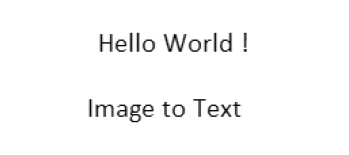

In [27]:
plt.imshow(image, cmap= "gray"), plt.axis("off");

In [28]:
text= pytesseract.image_to_string(image)

In [29]:
print(text)

Hello World !

Image to Text



<a id = "12"></a><br>
## Real Time Text Recognition

In [30]:
cap= cv2.VideoCapture(0)

points = []
font= cv2.FONT_HERSHEY_COMPLEX_SMALL

prev_frame_time = 0
new_frame_time = 0

fourcc = cv2.VideoWriter_fourcc(*'MPEG')

output = cv2.VideoWriter('output.mp4', fourcc,  20, (640,  480))

while True:
    
    _, frame= cap.read()
    frame= cv2.flip(frame, 1)
    
    # determine the roi
    roi= frame[50:300, 400:600]
    
    # determine the "CLEAR ALL" button
    roi[0:30, 0:140]= 0
    cv2.putText(roi, "CLEAR ALL", (5,20), font, 1, (255,255,255), 1)
    
    # determine the "img to text" button
    roi[220:250, 0:140]= 0
    cv2.putText(roi, "img2text", (10,240), font, 1, (255,255,255), 1)
    
    # convert to hsv
    hsv= cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
    
    # blue color range in hsv
    lower_blue = np.array([100,60,60])
    upper_blue = np.array([115,255,255])
    
    # mask the frame, for blue object detect
    mask= cv2.inRange(hsv, lower_blue, upper_blue)
    mask = cv2.erode(mask,(5,5),iterations =1)
    mask = cv2.morphologyEx(mask,cv2.MORPH_OPEN,(5,5))
    mask = cv2.dilate(mask,(5,5),iterations = 1)
    
    # find contours 
    contours,_ =cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    center = None

    if len(contours) > 0:  # if there is contour
        
        # find the contour with the largest area
        max_contours = sorted(contours, key = cv2.contourArea, reverse=True)[0]
        
        if cv2.contourArea(max_contours) > 350: # if contour area > 350
            # calculate minimum enclosing circle center and radius, and point them
            ((x,y),radius) = cv2.minEnclosingCircle(max_contours)
            cv2.circle(frame[50:300, 400:600], (int(x),int(y)), int(radius), (0,255,255), 3)
            center= (int(x),int(y))
    
    # if there is center, add them to points 
    if center:
        x,y= center
        points.append(center)
        
        # If there is object center in "CLEAR ALL" , clear all points
        if 0<= x <= 160:
            if 0<= y <= 50:
                points= []
         
        # If there is object center in "img2text" , show on screen
        if 0<= x <= 160:
            if 220<= y <= 250:     
                text= pytesseract.image_to_string(thresh, lang= "eng").split("\n")[0]
                cv2.putText(frame, text , (400, 350), font, 3, (255,0,0), 3)
        
    # circle the object
    if points:
        for center in points:
            x,y= center
            cv2.circle(frame[50:300, 400:600], (x,y), 5, (0,0,0), -1)
            
    # image binarization for text recognition
    image= frame[80:260, 405:600]
    gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
    
    # calculate FPS        
    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    fps = str(fps)
    cv2.putText(frame,"FPS: "+fps, (10, 50), font, 2, (0, 255, 0), 2, cv2.LINE_AA)

    # draw roi
    cv2.rectangle(frame, (400, 50), (600, 300), (0,0,255), 0)
    
    output.write(frame)
    
    cv2.imshow("Frame", frame)
    cv2.imshow("Image", thresh)

    
    if cv2.waitKey(1)== 27:
        break
        
cap.release()
output.release()
cv2.destroyAllWindows()